# Project Brief :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that comes while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where we come in as data scientist. Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

### ATTRIBUTES:

1. country = Name of the country 
2. child_mort = Death of children under 5 years of age per 1000 live births 
3. exports = Exports of goods and services. Given as %age of the Total GDP 

4. health = Total health spending as %age of Total GDP 

5. imports =  Imports of goods and services. Given as %age of the Total GDP 

6. Income =  Net income per person 

7. Inflation =  The measurement of the annual growth rate of the Total GDP 

8. life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same 

9. total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same. 

10. gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population. 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/USL - GL/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 1.	Data Understanding :

In [3]:
print(f' {df.shape[0]} - rows and {df.shape[1]} - columns')

 167 - rows and 10 - columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

<b><i> Observation :
    
    There are 9 continuous variables and 1 categorical variable.

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df['country'].value_counts(normalize=True)*100

Estonia         0.598802
Spain           0.598802
Kenya           0.598802
Madagascar      0.598802
Sierra Leone    0.598802
                  ...   
Finland         0.598802
Morocco         0.598802
Gabon           0.598802
Mongolia        0.598802
Oman            0.598802
Name: country, Length: 167, dtype: float64

<b><i> Observation :
    
    Only Country variable is categorical in the dataset. There are 167 countries.

<b><i> Covariance Table:

In [8]:
df.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


<b><i> Correlation Table:

In [9]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


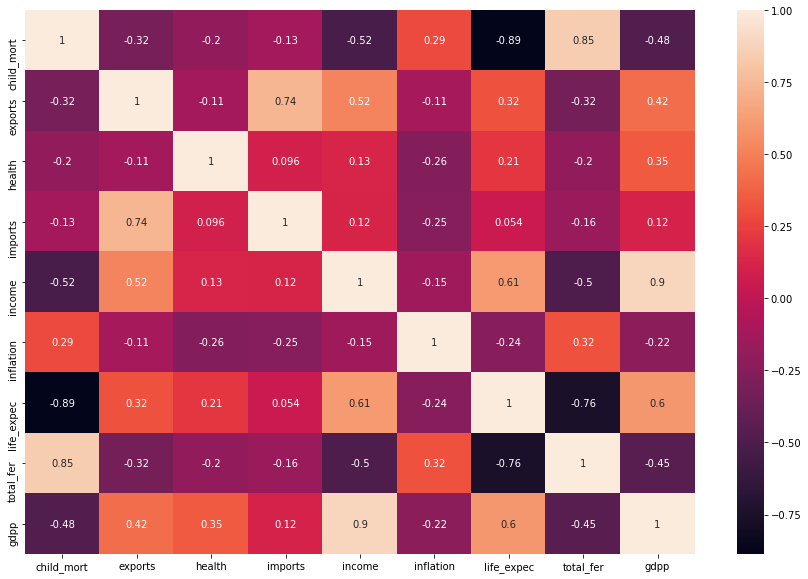

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<b><i> Observation :
    
    Positive Correlation:
    
        *0.92 for total_fer and child_mortality
        *0.92 for income and gdpp
        *0.68 for life exp and income
        *0.65 for life exp and gdpp
        *0.69 for imports and exports
        
    Negative Correlation:
        
        *-0.91 for child mortality and life exp
        *-0.84 for life exp and total_fer

### 2.	Data Preparation 


<b><i> Checking for missing values :
    
    

In [11]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<b><i> Observation :
    
    There are no missing values present in the dataset.

In [12]:
df['country'].nunique()

167

In [13]:
df1 = df.drop('country',axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<b><i> Observation :
    
    Since there are 167 unique values in countries, we can drop it.

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(df1),columns = df1.columns)

In [15]:
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### 3.	Dimensionality Reduction

In [16]:
from sklearn.decomposition import PCA 

In [17]:
pca = PCA()
pca_x = pca.fit_transform(X_scaled)

In [18]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [19]:
total = sum(pca.explained_variance_)
np.cumsum(pca.explained_variance_/total*100)

array([ 45.95173979,  63.13336544,  76.13762433,  87.19078614,
        94.53099756,  97.01523224,  98.27566264,  99.25694438,
       100.        ])

<b><i> Observation :
    
    We need 4 PCA components so that 90% of the variance in data is explained.

<b><i> DataFrame with Principle Components :

In [20]:
pca_df = pd.DataFrame(pca.fit_transform(X_scaled))
pca_df.head()

,0,1,2,3,4,5,6,7,8
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0.415076,-0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,-0.221042,0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,-0.184162,0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,-0.355998,-0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,-0.023681,0.094270


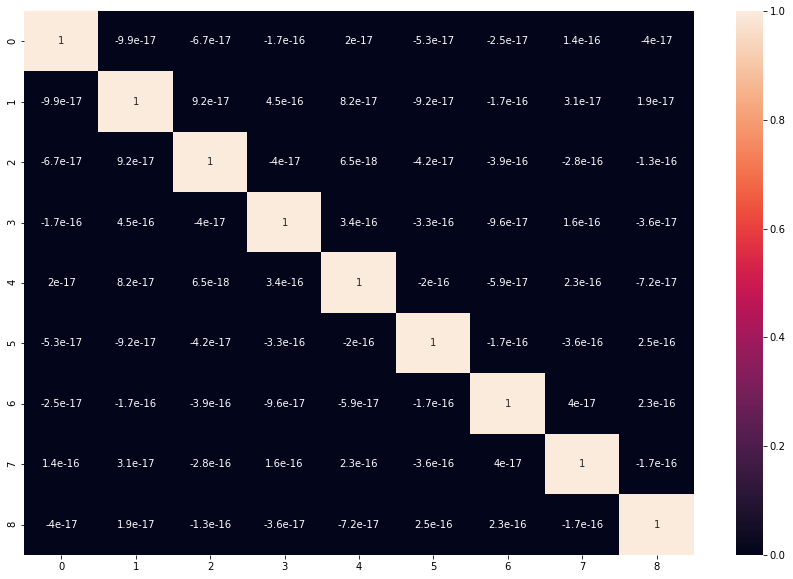

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(pca_df.corr(),annot=True)
plt.show()

<b><i> Observation :
    
    With the above heatmap, we can see that all the correlations are very low, therefore we conclude that there is no multicollinearity in the Principal Components.

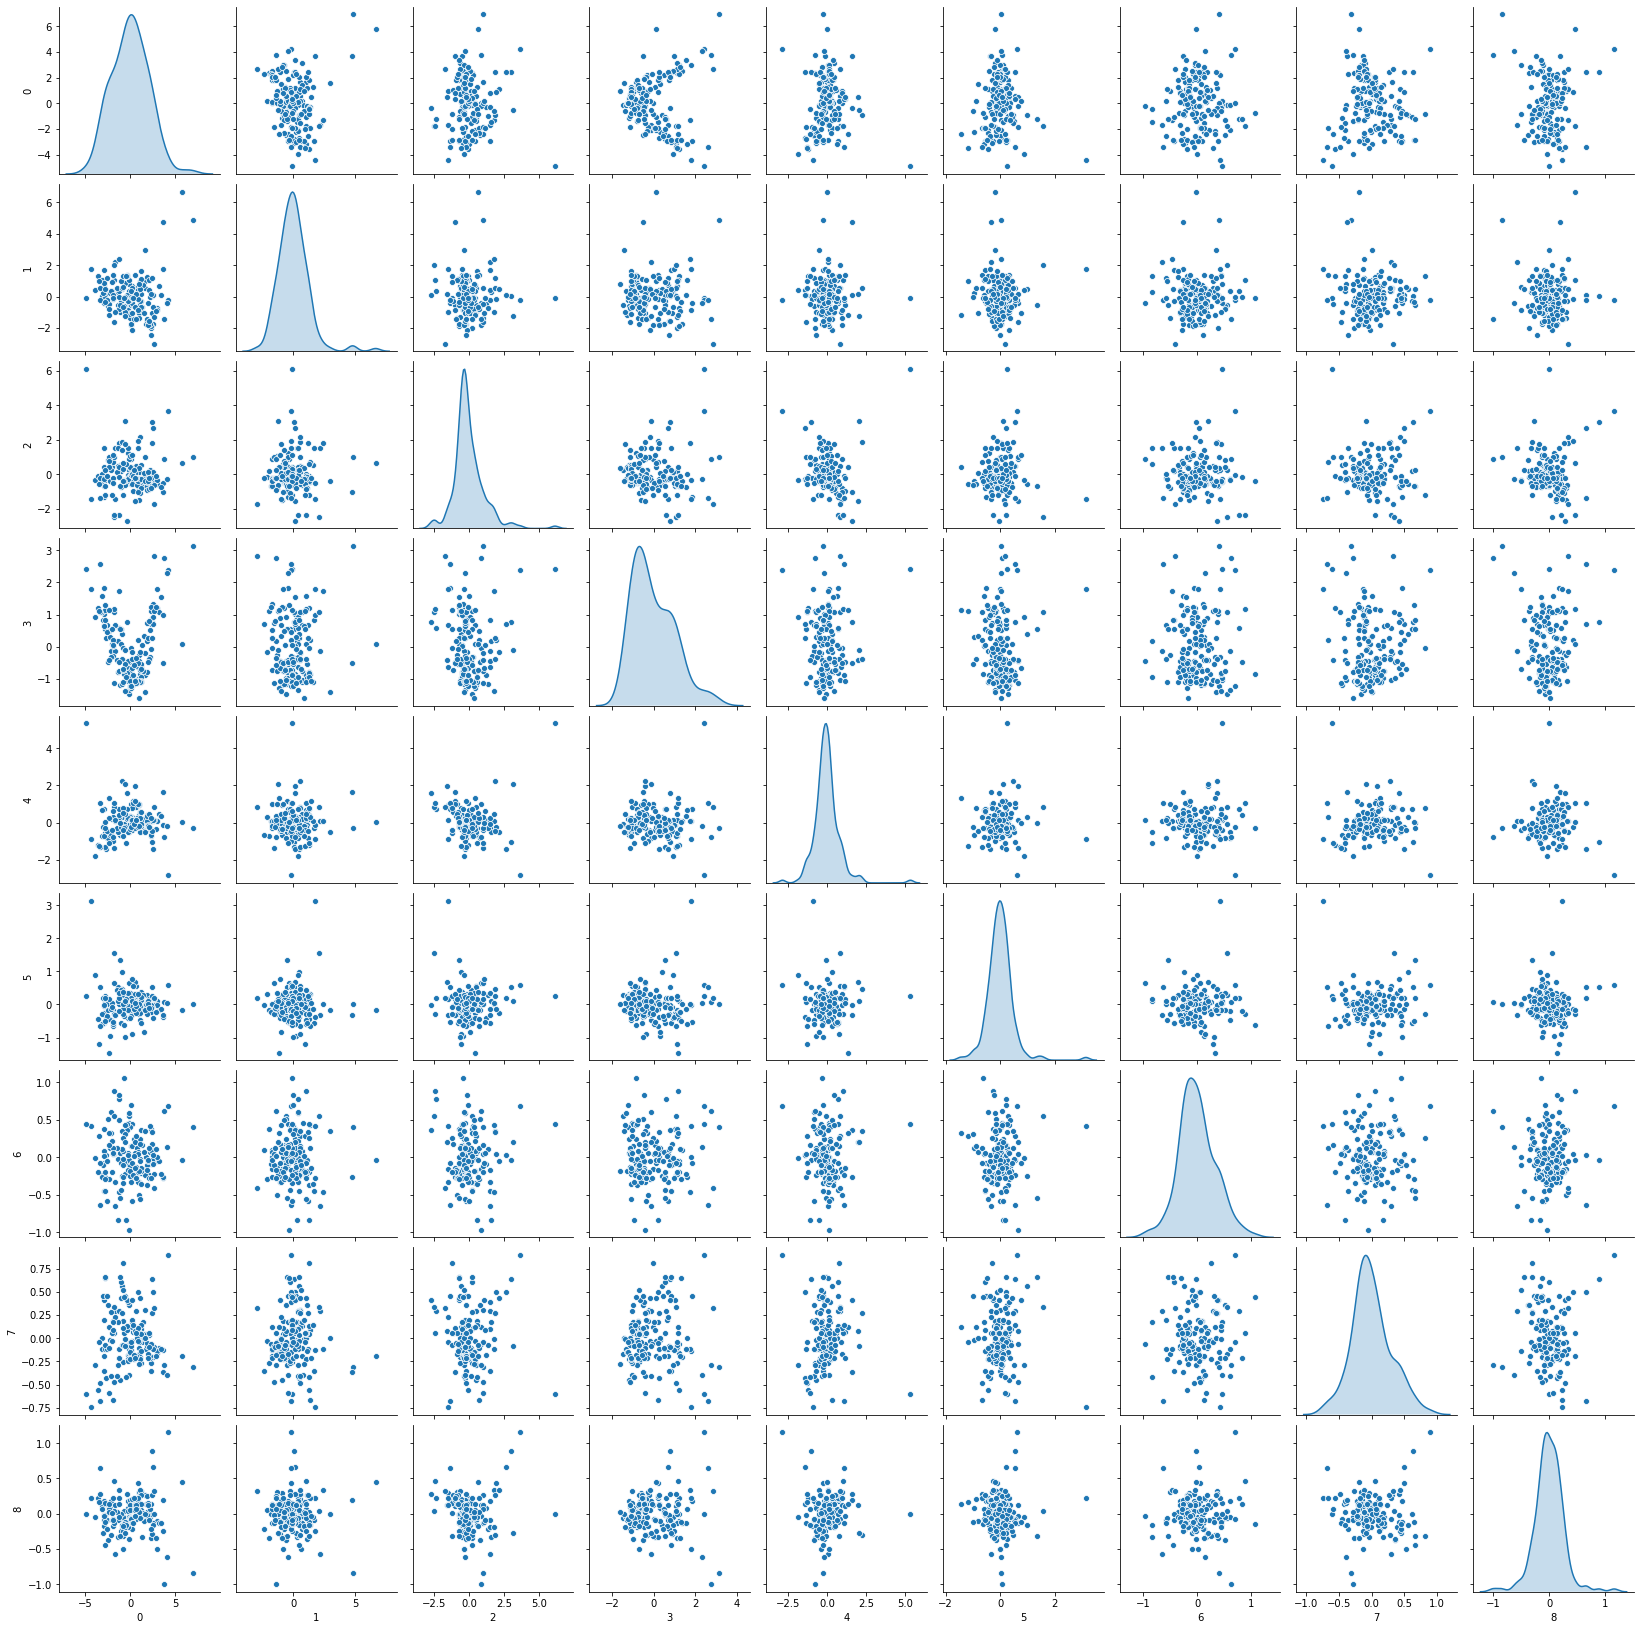

In [22]:
sns.pairplot(pca_df, diag_kind = 'kde')
plt.show()

<b><i> 
    Observation :
 
 
 
  * In the diagonal plots we can see the distribution of each components.
  * It is observed that the distribution is near-normal for some of the components. 
  * Some components' peak are having high peaks.
  * We can there are 3 clusters in the kde plot.
  


<b><i> Refitting using 4 Principal Components :

In [23]:
pca_4 = PCA(n_components=4)
pca_final = pd.DataFrame(pca_4.fit_transform(X_scaled))
pca_final.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [24]:
pca_final.shape

(167, 4)

<b><i> Pairplot for 4 Principal Components :

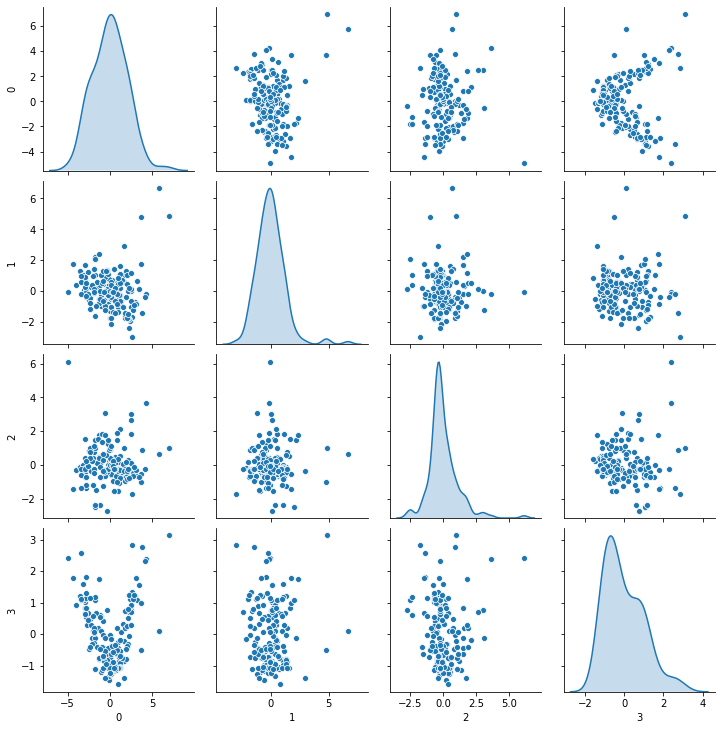

In [25]:
sns.pairplot(pca_final, diag_kind = 'kde')
plt.show()

<b><i> Heatmap for 4 Principal Components :

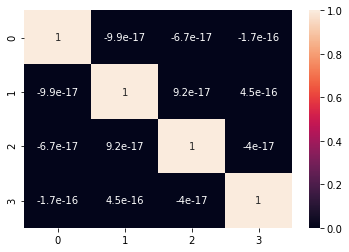

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(pca_final.corr(),annot=True)
plt.show()

<b><i>	Check for outliers :

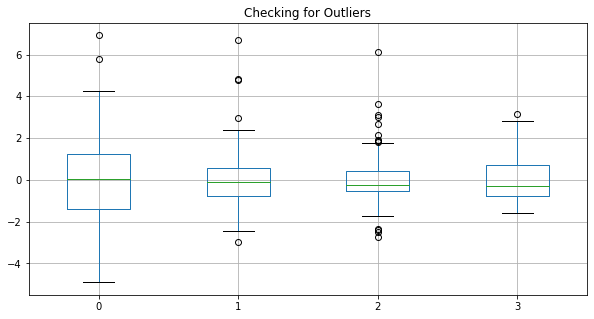

In [27]:
plt.figure(figsize=(10,5))
pca_final.boxplot()
plt.title('Checking for Outliers')
plt.show()

<b><i> 
    Observation :
 
 
 
  * There are many outliers present in the 1st and 2nd components.
  


<b><i> IQR method to remove the outliers :

In [28]:
Q1 = pca_final.quantile(0.25)
Q3 = pca_final.quantile(0.75)
IQR = Q3-Q1

In [29]:
a = pca_final[~((pca_final < (Q1 - 1.5 * IQR)) | (pca_final > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [30]:
a.shape

(149, 4)

In [31]:
pca_final.shape

(167, 4)

<b><i> 
    Observation :
 
 
 
  * Since it is only less than 10% outliers, I'm planning to keep them. I feel it is important to keep them according to this dataset.
  


### 4. Clustering 

<b><i> 1. Using Kmeans method

In [32]:
from sklearn.cluster import KMeans

In [33]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(pca_final)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

In [34]:
cluster_df = pd.DataFrame({'Number of clusters' : cluster_range, 'Cluster_errors' : cluster_errors})
cluster_df

,Number of clusters,Cluster_errors
0,1,1310.477516
1,2,859.095410
2,3,643.353030
3,4,514.134157
4,5,445.938767
5,6,396.679349
6,7,360.880722
7,8,319.223696
8,9,287.861163
9,10,264.193163


<b><i> Elbow Plot :

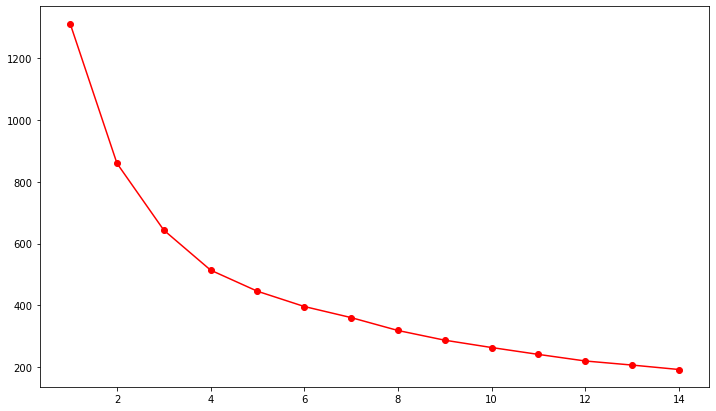

In [35]:
plt.figure(figsize=(12,7))
plt.plot(cluster_df['Number of clusters'],cluster_df['Cluster_errors'],marker = 'o',color = 'r')
plt.show()

<b><i> 
    Observation :
 
 
 
  * From the above elbow plot we can the bend at 3, so we can use k = 3 for KMeans.
  


In [36]:
kmeans = KMeans(n_clusters=3) #randomly choosing K=3
clusters1 = kmeans.fit_predict(pca_final)
clusters1

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [37]:
df_k = pca_final.copy(deep=True)
df_k['label'] = clusters1

In [38]:
df_k.head()

,0,1,2,3,label
0,-2.913025,0.095621,-0.718118,1.005255,2
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,2
4,1.033576,0.136659,-0.225721,-0.847063,1


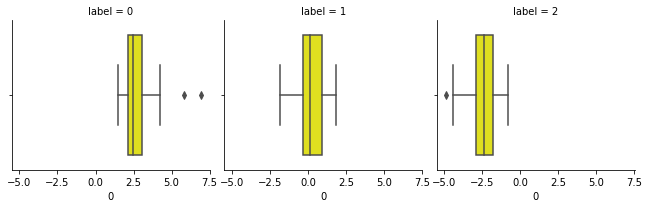

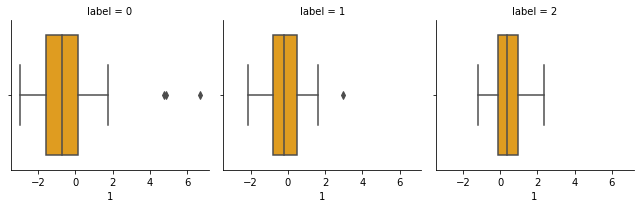

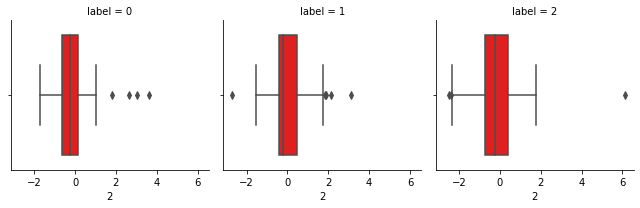

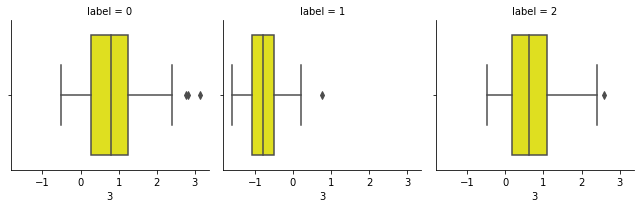

In [39]:
a = sns.FacetGrid(df_k, col='label')
a.map(sns.boxplot, 0, color= 'yellow', order = ['0','1','2'])

b = sns.FacetGrid(df_k, col='label')
b.map(sns.boxplot, 1, color= 'orange', order = ['0','1','2'])

c = sns.FacetGrid(df_k, col='label')
c.map(sns.boxplot, 2, color= 'red', order = ['0','1','2'])

d = sns.FacetGrid(df_k, col='label')
d.map(sns.boxplot, 3, color= 'yellow', order = ['0','1','2'])

plt.show()

<b><i> 2. Using Agglomerative Clustering method :

In [40]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
merg = linkage(pca_final, method = 'ward')

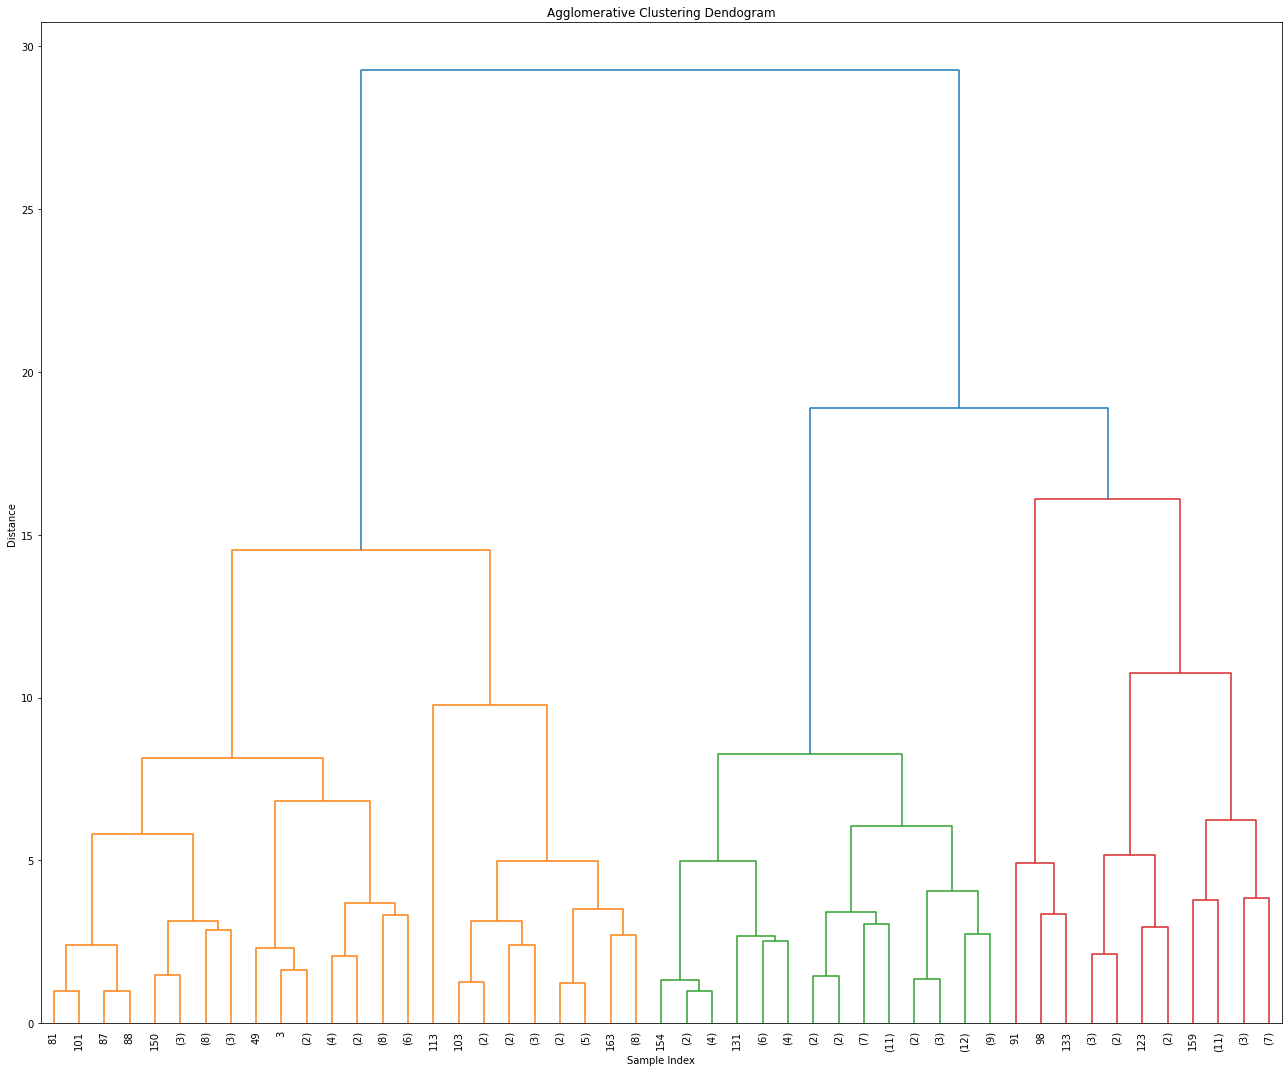

In [43]:
plt.figure(figsize=(18,15))
plt.title('Agglomerative Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(merg, leaf_rotation = 90,p = 5,color_threshold = 18,leaf_font_size = 10, truncate_mode= 'level')
plt.tight_layout()
plt.show()

<b><i> 
    Observation :
 
 
 
  * From the above dendogram we can see there are 3 clusters, so we can use n = 3.
  


In [44]:
hie_clus = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
cluster2 = hie_clus.fit_predict(pca_final)
df_h = pca_final.copy(deep = True)
df_h['label']  = cluster2

In [45]:
df_h.head()

,0,1,2,3,label
0,-2.913025,0.095621,-0.718118,1.005255,1
1,0.429911,-0.588156,-0.333486,-1.161059,2
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,1
4,1.033576,0.136659,-0.225721,-0.847063,2


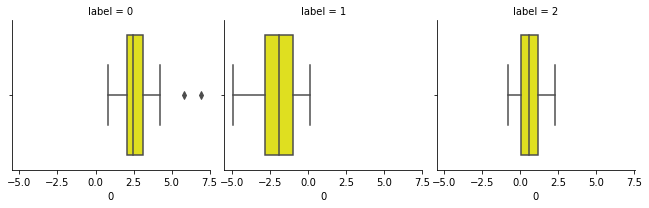

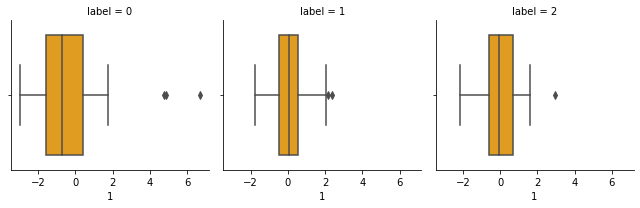

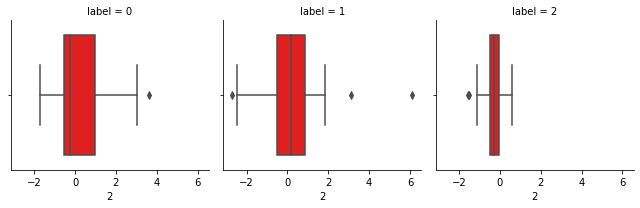

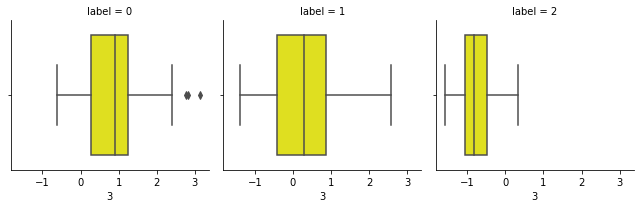

In [46]:
a = sns.FacetGrid(df_h, col='label')
a.map(sns.boxplot, 0, color= 'yellow', order = ['0','1','2'])

b = sns.FacetGrid(df_h, col='label')
b.map(sns.boxplot, 1, color= 'orange', order = ['0','1','2'])

c = sns.FacetGrid(df_h, col='label')
c.map(sns.boxplot, 2, color= 'red', order = ['0','1','2'])

d = sns.FacetGrid(df_h, col='label')
d.map(sns.boxplot, 3, color= 'yellow', order = ['0','1','2'])

plt.show()

<b><i>  Finding the optimal number of cluster Value.

<b><i> 
    Observation :
 
 
 
  * From the above elbow plot for Kmeans and dendogram for Agglomerative Clustering we can see say the optimal number of clusters are 3 , so we can use n = 3.
  


<b><i> 1. Silhouette score for KMeans :

In [47]:
from sklearn.metrics import silhouette_score
cluster_range = range(2,10)
sil_score = []
for num_cluster in cluster_range:
    kmeans = KMeans(n_clusters= num_cluster) 
    clusters_labels = kmeans.fit_predict(pca_final)
    sil_score.append(silhouette_score(pca_final,clusters_labels))

In [48]:
sil_score_df = pd.DataFrame({'Number of Cluster' : cluster_range, 'silhouette sore' : sil_score})
sil_score_df

,Number of Cluster,silhouette sore
0,2,0.321650
1,3,0.334086
2,4,0.352217
3,5,0.286007
4,6,0.290450
5,7,0.307494
6,8,0.260701
7,9,0.275711


<b><i> 2. Silhouette Score Agglomerative Clustering :

In [49]:
from sklearn.metrics import silhouette_score
cluster_range = range(2,10)
sil_score_hie = []
for num_cluster in cluster_range:
    agg = AgglomerativeClustering(n_clusters= num_cluster,linkage='ward',affinity = 'euclidean') 
    clusters_labels = agg.fit_predict(pca_final)
    sil_score_hie.append(silhouette_score(pca_final,clusters_labels))

In [50]:
sil_score_hie_df = pd.DataFrame({'Number of Cluster' : cluster_range, 'silhouette sore' : sil_score_hie})
sil_score_hie_df

,Number of Cluster,silhouette sore
0,2,0.307011
1,3,0.270052
2,4,0.287700
3,5,0.295774
4,6,0.320253
5,7,0.305897
6,8,0.271141
7,9,0.264148


<b><i> 
    Observation :
 
 
 
  * From the above silhouette score for KMeans we can see silhouette score for 2 and 3 is higher.
  * From the above silhouette score for Agglomerative Clustering we can see that silhouette score for 2 and 3 is higher.
  * But in elbow plot and dendogram we can see the clusters are 3, therefore, I'm planning to choose optimal clusters as 3.
  * KMeans Silhouette score for cluster = 3 is higher than that of aggloerative clustering.

<b><i> 3. Inertia score for KMeans :

In [51]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(pca_final)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

In [52]:
cluster_df = pd.DataFrame({'Number of clusters' : cluster_range, 'Cluster_errors' : cluster_errors})
cluster_df

,Number of clusters,Cluster_errors
0,1,1310.477516
1,2,859.095410
2,3,643.353030
3,4,514.177938
4,5,446.061470
5,6,407.007705
6,7,361.702608
7,8,327.184601
8,9,292.425728
9,10,261.923968


<b><i> 
    Observation :
 
 
 
  * From the above inertia score we can see that cluster = 3 has less inertia.
  


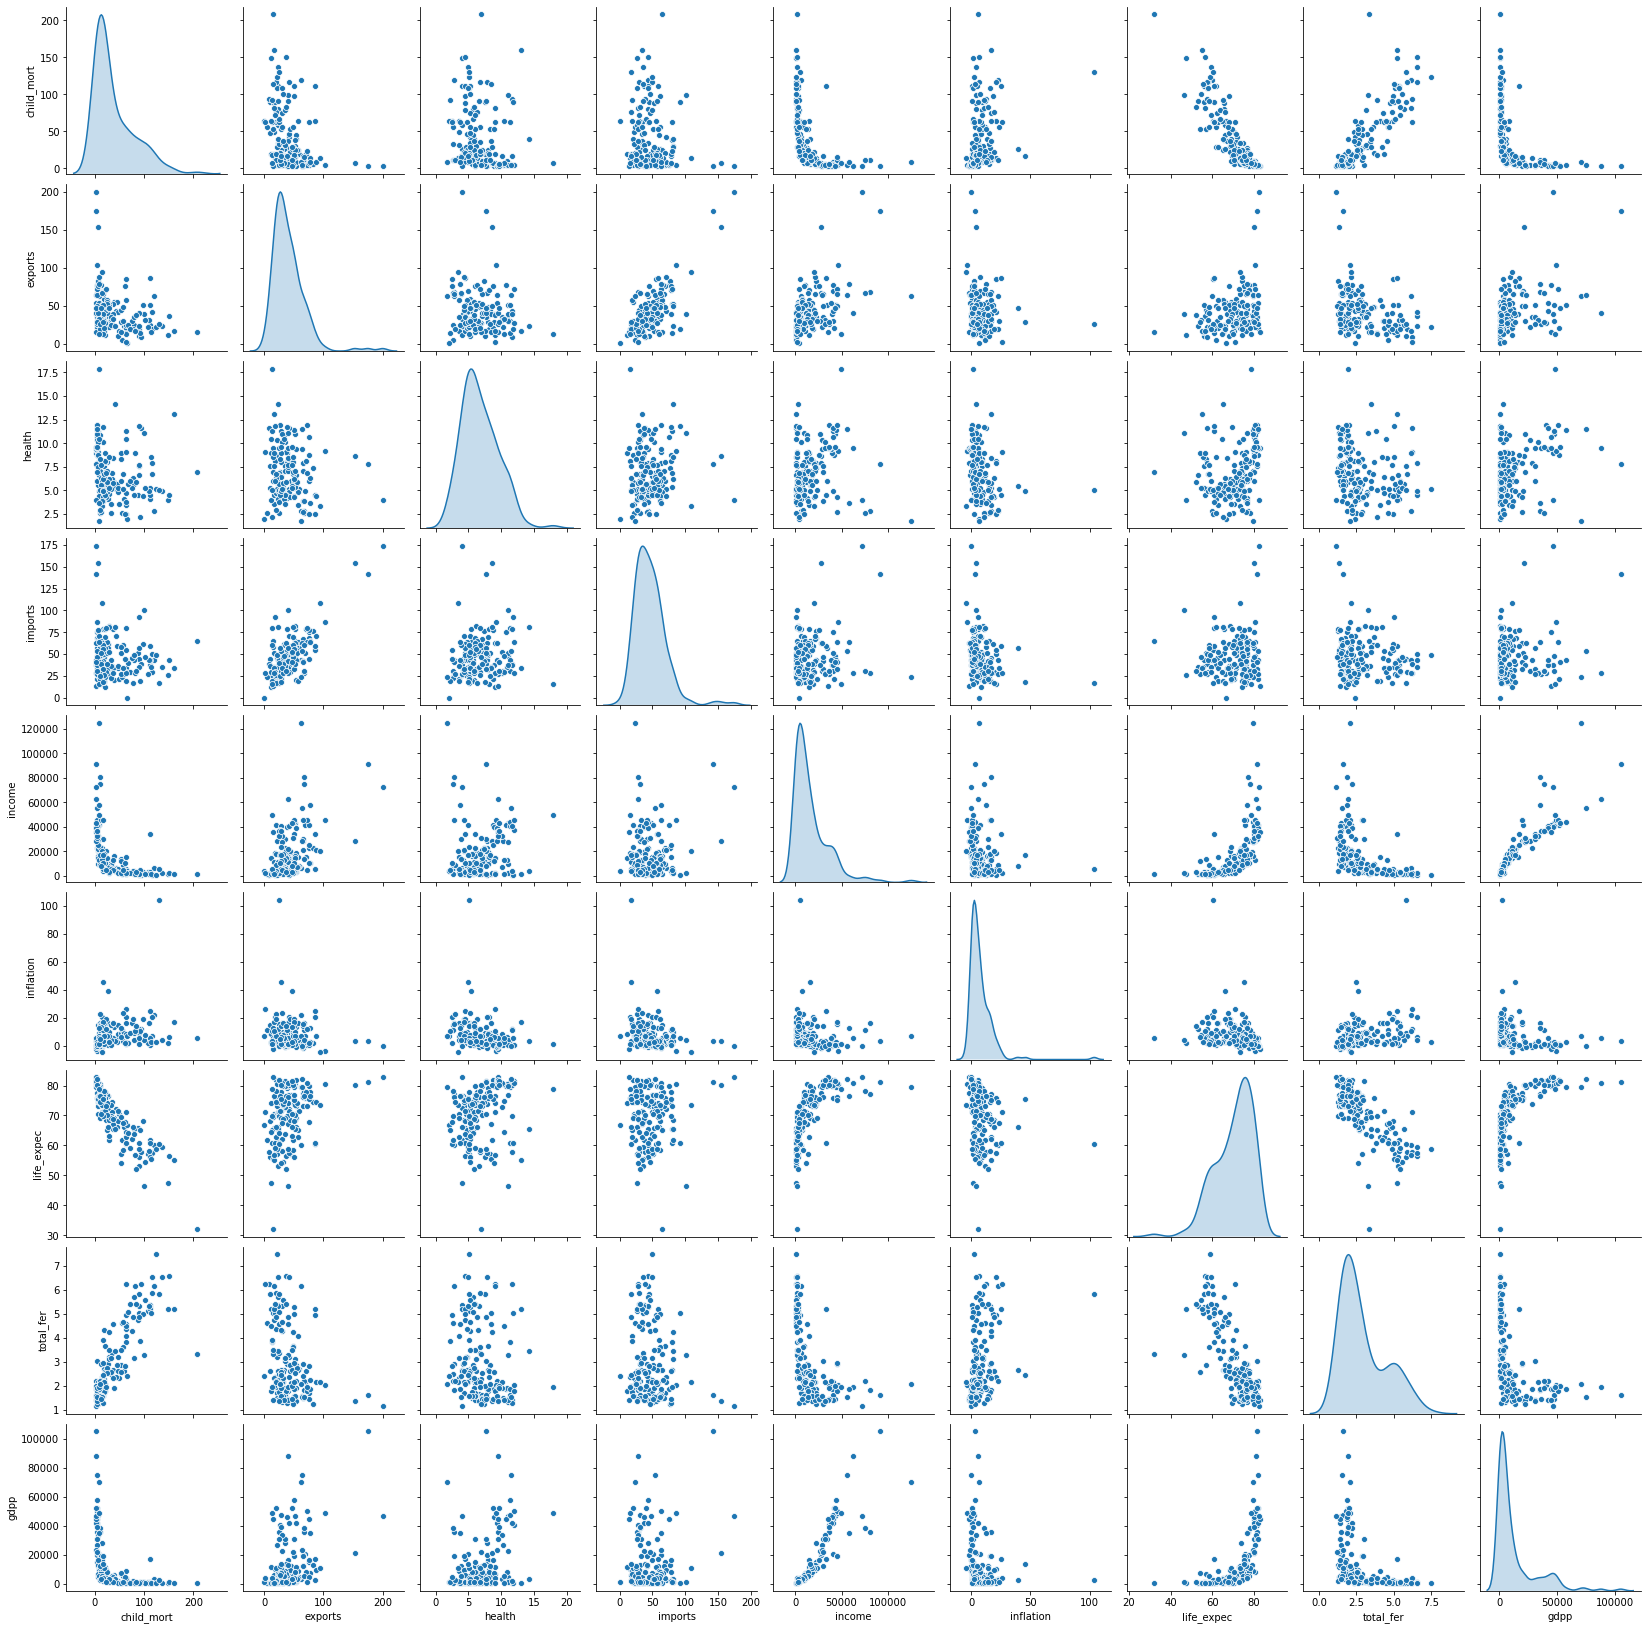

In [53]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

<b><i> 
    Observation :
 
 
 
  * From the above pairplot we can child_mort and life_expec are best attributes based on kde plot separation.


In [54]:
df_original = df.copy(deep=True)
df_original['label'] = clusters1

In [55]:
df_original.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [56]:
df_original['label'].value_counts()

1    84
2    48
0    35
Name: label, dtype: int64

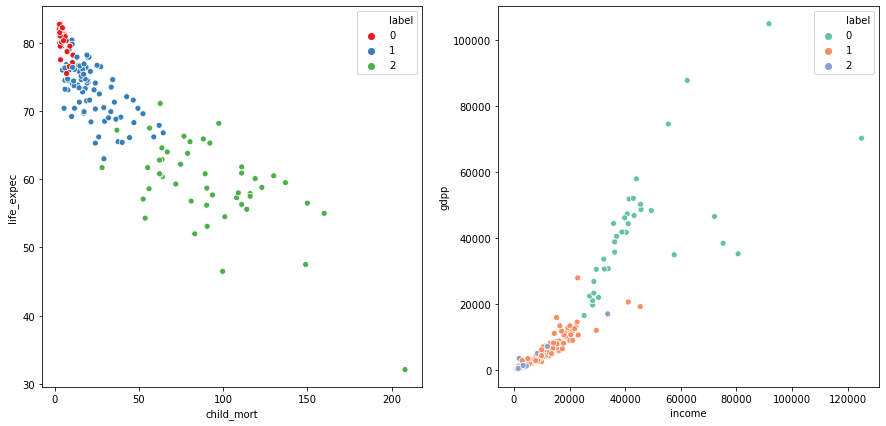

In [57]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(x=df_original['child_mort'],y=df_original['life_expec'],hue=df_original['label'],
                ax = axes[0], palette = 'Set1')
sns.scatterplot(x=df_original['income'],y=df_original['gdpp'],hue=df_original['label'],
                ax = axes[1], palette = 'Set2')

plt.show()

<b><i> 
    Observation :
 
 
 
  * From the above scaterplot we can see the clusters are separated well.


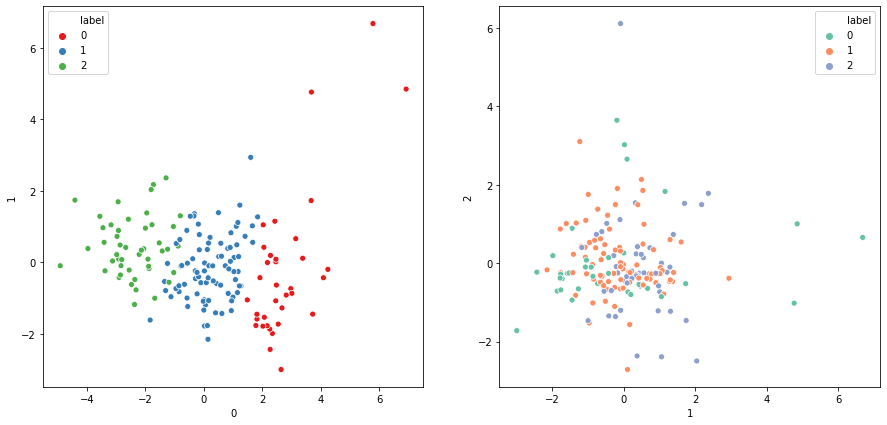

In [58]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(x = 0,y = 1,hue = 'label', data = df_k, ax = axes[0], palette= 'Set1')
sns.scatterplot(x = 1,y = 2 ,hue = 'label', data = df_k, ax = axes[1], palette= 'Set2')
plt.show()

<b><i> 
    Observation :
 
 
 
  * From the above silhouette score for both KMeans and Agglomerative clustering we can see that KMeans has the highest silhouette score for cluster = 3, so we can say that KMeans is a good model.
  * The clusters are very well separated.


<b> <i> Building a Model based on Kmeans Clustering :

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df_k.drop('label',axis=1)
y = df_k['label']

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(random_state=0)
rf.fit(xtrain,ytrain)
kmeans_train = rf.score(xtrain,ytrain)
kmeans_train

1.0

In [64]:
kmeans_test = rf.score(xtest,ytest)
kmeans_test

0.9411764705882353

<b> <i> Building a Model based on Kmeans Clustering :

In [65]:
X_a = df_h.drop('label',axis=1)
y_a = df_h['label']

In [66]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X_a,y_a,test_size = 0.3, random_state = 0)

In [67]:
rf = RandomForestClassifier(random_state=0)
rf.fit(xtrain1,ytrain1)
agg_train = rf.score(xtrain1,ytrain1)
agg_train

1.0

In [68]:
agg_test = rf.score(xtest1,ytest1)
agg_test

0.9215686274509803

In [69]:
accuracy = pd.DataFrame({'KMeans' : [kmeans_train, kmeans_test], 'Agg' : [agg_train, agg_test]}, index = ['Train','Test'])
accuracy

,KMeans,Agg
Train,1.000000,1.000000
Test,0.941176,0.921569


<b><i> 
    Observation :
 
 
 
  * The prediction using Kmeans clustering is much better than Agglomerative Clustering.
  * KMeans method gives a testing accuracy of 2% higher than the testing accuracy of Agglomerative clustering.


<b> <i> Business Interpretation :

<b> <i>
  * Income and gdp are the measures of development.
  * Coutries with high income and gdp tend to perform better. Hence the countries which lower gdp and per captia income are the ones which are need for aid.
  * Countries which could spend low on their will tend to fall under the lower GDP catergory which are under aid.

---------